In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
grayimg = "../../introduction/images/albert-einstein_gray.jpg"
gray = cv.imread(grayimg, cv.IMREAD_GRAYSCALE)

In [3]:
numRows = gray.shape[0]
numCols = gray.shape[1]

In [4]:
a = 90
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))
R = np.array([[ca,-sa],[sa,ca]])
rmax, cmax = gray.shape[0], gray.shape[1]
coords = np.array([[0,0], [0,cmax-1], [rmax-1,0], [rmax-1,cmax-1]])

In [5]:
coords, coords.shape

(array([[  0,   0],
        [  0, 727],
        [948,   0],
        [948, 727]]),
 (4, 2))

In [6]:
R.shape

(2, 2)

In [7]:
R

array([[ 6.123234e-17, -1.000000e+00],
       [ 1.000000e+00,  6.123234e-17]])

In [8]:
coords.T

array([[  0,   0, 948, 948],
       [  0, 727,   0, 727]])

In [9]:
rotated_coords = R.dot(coords.T)

In [10]:
rotated_coords

array([[ 0.00000000e+00, -7.27000000e+02,  5.80482583e-14,
        -7.27000000e+02],
       [ 0.00000000e+00,  4.45159111e-14,  9.48000000e+02,
         9.48000000e+02]])

In [11]:
mins = rotated_coords.min(axis=1)
maxs = rotated_coords.max(axis=1)

In [12]:
mins, maxs

(array([-727.,    0.]), array([5.80482583e-14, 9.48000000e+02]))

In [13]:
minR = np.int64(np.floor(mins[0]))
minC = np.int64(np.floor(mins[1]))
maxR = np.int64(np.ceil(maxs[0]))
maxC = np.int64(np.ceil(maxs[1]))

In [14]:
H = (maxR - minR) + 1
W = (maxC - minC) + 1

In [15]:
H,W

(np.int64(729), np.int64(949))

In [16]:
new_I = np.zeros((H,W), dtype="uint8")

In [17]:
new_I.shape

(729, 949)

In [18]:
Rinv = np.linalg.inv(R)

In [19]:
Rinv

array([[ 6.123234e-17,  1.000000e+00],
       [-1.000000e+00,  6.123234e-17]])

In [20]:
def f_bilinearInterpolate(r,c,I):
    lc = int(c)
    rc = lc+1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr+1
    wt = br-r
    wb = r-tr
    if tr >= 0 and br < I.shape[0] and lc >=0 and rc < I.shape[1]:
        a = wl*I[tr,lc] + wr*I[tr,rc]
        b = wl*I[br,lc] + wr*I[br,rc]
        g = wt*a + wb*b
        return np.uint8(g)
    else:
        return 0

In [21]:
for new_i in range(minR,maxR):
    for new_j in range(minC,maxC):
        P_dash = np.array([new_i,new_j])
        P = Rinv.dot(P_dash)
        i , j = P[0] , P[1]
        if i < 0 or i>=numRows or j<0 or j>=numCols:
            pass
        else:
            g = f_bilinearInterpolate(i,j,gray)
            new_I[new_i-minR,new_j-minC] = g

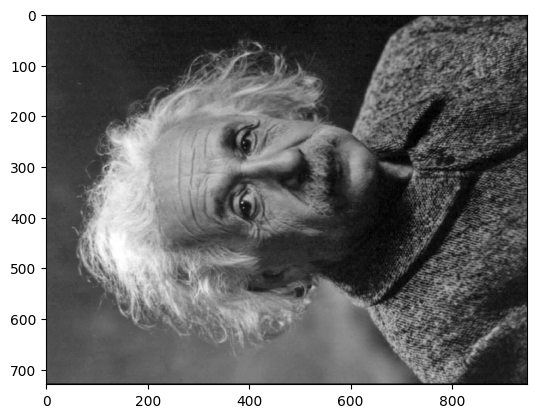

In [22]:
plt.imshow(new_I, cmap="gray")
plt.show()